# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)



        
        
        
# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
test_cities = ["New York", "Mexico City", "Los Angeles"]
weather_data = []

# for city in test_cities:
for city in cities:
#     City
#       Lat
#       Lng
#       Max Temp
#       Humidity
#       Cloudiness
#       Wind Speed
#       Country
#       Date
    response = requests.get(query_url + city).json()
#     print(response)
    try:
        my_weather_dict = {

          "City":response ["name"],
          "Lat":response['coord']['lat'],
          "Lng":response['coord']['lon'],
          "Max Temp":response['main']['temp_max'],
          "Humidity":response['main']['humidity'],
          "Cloudiness":response ['clouds']['all'],
          "Wind Speed":response ['wind']['speed'],
          "Country":response ['sys']['country'],
          "Date":response ['dt']
        }
        weather_data.append(my_weather_dict)
    except:  
        print("================================================================")
        print("City not found")
        print("================================================================")
#     lat_lngs.append(response['coord']['Lat'])
#     cities.append(response['main']['City'])
    

weather_data

City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found


[{'City': 'Lebu',
  'Lat': -37.6167,
  'Lng': -73.65,
  'Max Temp': 18.5,
  'Humidity': 69,
  'Cloudiness': 0,
  'Wind Speed': 6.45,
  'Country': 'CL',
  'Date': 1614872862},
 {'City': 'Jamestown',
  'Lat': 42.097,
  'Lng': -79.2353,
  'Max Temp': -1.11,
  'Humidity': 92,
  'Cloudiness': 90,
  'Wind Speed': 6.21,
  'Country': 'US',
  'Date': 1614872863},
 {'City': 'Hobart',
  'Lat': -42.8794,
  'Lng': 147.3294,
  'Max Temp': 12.22,
  'Humidity': 58,
  'Cloudiness': 95,
  'Wind Speed': 5.66,
  'Country': 'AU',
  'Date': 1614872760},
 {'City': 'Castro',
  'Lat': -24.7911,
  'Lng': -50.0119,
  'Max Temp': 23.18,
  'Humidity': 77,
  'Cloudiness': 95,
  'Wind Speed': 5.42,
  'Country': 'BR',
  'Date': 1614872863},
 {'City': 'Sørland',
  'Lat': 67.667,
  'Lng': 12.6934,
  'Max Temp': -1,
  'Humidity': 93,
  'Cloudiness': 98,
  'Wind Speed': 7.72,
  'Country': 'NO',
  'Date': 1614872863},
 {'City': 'Goiânia',
  'Lat': -16.6786,
  'Lng': -49.2539,
  'Max Temp': 29,
  'Humidity': 54,
  'Cloudin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df = pd.DataFrame(weather_data)
weather_df.to_csv("city_data.csv", index = False)

In [20]:
weather_df.sort_values(by = ['Humidity'], ascending = False)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
333,Airai,-8.9266,125.4092,15.92,100,82,0.23,TL,1614872932
374,Mount Gambier,-37.8333,140.7667,14.00,100,90,4.63,AU,1614872940
432,Kuching,1.5500,110.3333,23.00,100,40,1.03,MY,1614872953
363,Spas-Klepiki,55.1347,40.1767,-0.56,100,100,1.75,RU,1614872937
151,Valparaíso,-33.0393,-71.6273,15.00,100,90,2.57,CL,1614872894
...,...,...,...,...,...,...,...,...,...
346,Gao,16.6362,1.6370,36.50,8,20,1.00,ML,1614872934
550,Diapaga,12.0708,1.7889,39.48,8,0,3.89,BF,1614872976
452,Adrar,20.5022,-10.0711,31.20,6,100,4.38,MR,1614872957
543,Kollo,13.3043,2.3390,39.00,5,0,5.14,NE,1614872974


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

### No cities with Humidity over 100, several at 100. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

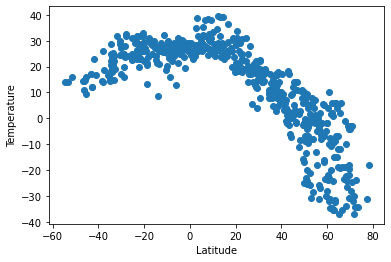

In [55]:
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig("lat_temp.png")
plt.show()

# Code is showing correlation between latitude and temperature; ie closer to equator the warmer the temp

## Latitude vs. Humidity Plot

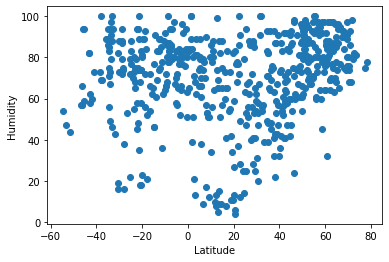

In [54]:
x_values = weather_df['Lat']
y_values = weather_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("lat_humid.png")
plt.show()

# Showing how humidy changes as you arrive closer to equator. Not a clear and obvious correlation.

## Latitude vs. Cloudiness Plot

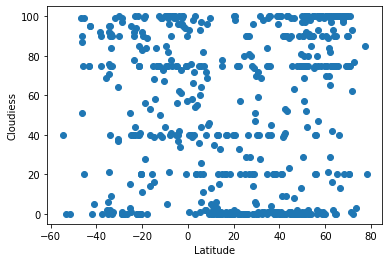

In [53]:
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiess')
plt.savefig("lat_cloud.png")
plt.show()

# Showing correlation of cloudiness as you approach equator, not a clear an obvious trend. 

## Latitude vs. Wind Speed Plot

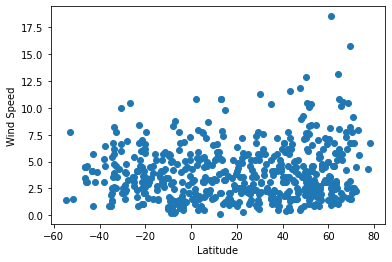

In [52]:
x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("lat_ws.png")
plt.show()

# Showig correlation of latitude and wind speed as you approach equator. No clear relationship shown. 

## Linear Regression

In [32]:
# divide df into North and South 
north_df = weather_df.loc[weather_df['Lat']>= 0]
south_df = weather_df.loc[weather_df['Lat']< 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

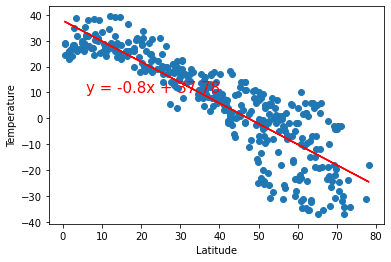

In [56]:
x_values = north_df['Lat']
y_values = north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig("n_lat_temp.png")
plt.show()

# Shows as you go further north, the temp decreases. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

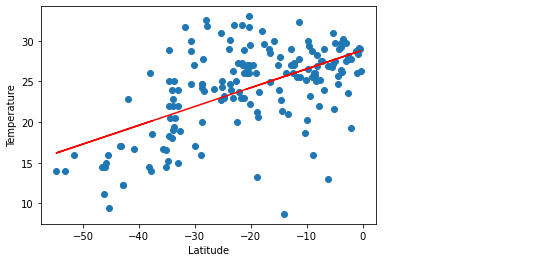

In [57]:
x_values = south_df['Lat']
y_values = south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig("s_lat_temp.png")
plt.show()

# Shows further south you go, colder the temp gets. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

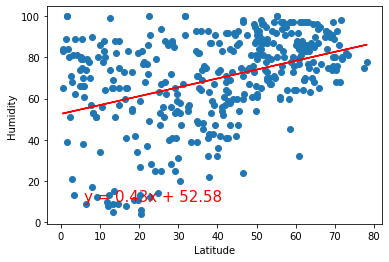

In [58]:
x_values = north_df['Lat']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("n_lat_humid.png")
plt.show()

#Shows that there is a slight correlation that the further north the more humid it may be. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

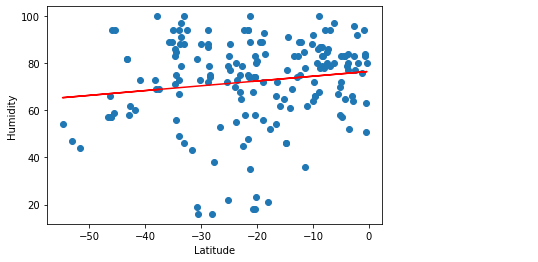

In [59]:
x_values = south_df['Lat']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("s_lat_humid.png")
plt.show()

# Shows slight correlation that further south you go, the less humid it will be. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

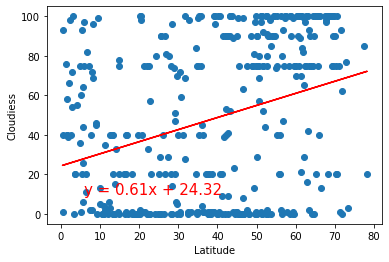

In [60]:
x_values = north_df['Lat']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiess')
plt.savefig("n_lat_cloud.png")
plt.show()

# Further north you go, more cloudy it will be. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

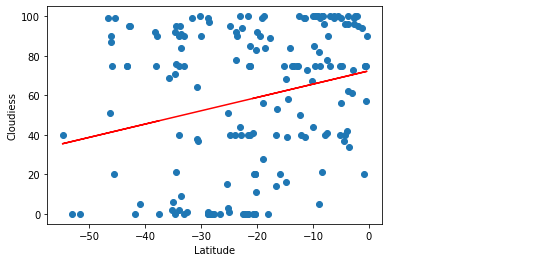

In [61]:
x_values = south_df['Lat']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiess')
plt.savefig("s_lat_cloud.png")
plt.show()

# Further south you go, less cloudy it may be. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

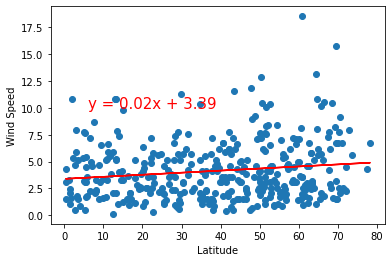

In [62]:
x_values = north_df['Lat']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("n_lat_wind.png")
plt.show()

# Slight correlation that further north you go, slightly more windy. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

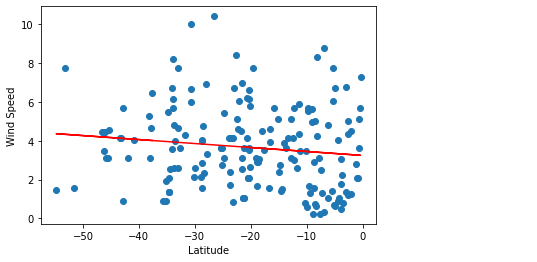

In [63]:
x_values = south_df['Lat']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("s_lat_wind.png")
plt.show()


# Furhter south you go, wind speed picks up. 